# Navigation World MDP

In [1]:
# Other Imports.
from simple_rl.tasks import NavigationWorldMDP
from simple_rl.agents import QLearningAgent
from simple_rl.planning import ValueIteration
from simple_rl.tasks.grid_world.GridWorldStateClass import GridWorldState
from simple_rl.tasks.navigation.NavigationStateClass import NavigationWorldState
from simple_rl.tasks.navigation.NavigationWorldMDP import *

# Python Imports.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

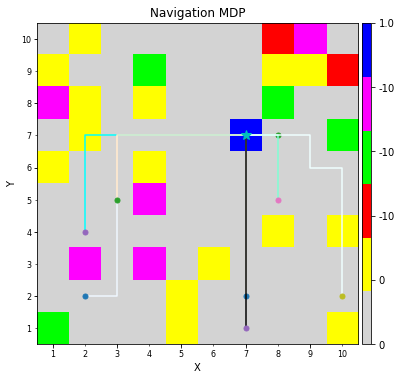

(<Figure size 432x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12c5a9588>)

In [2]:
np.random.seed(0)
nvmdp = NavigationWorldMDP(width=10, height=10, 
                      nav_cell_types=['lightgray', 'yellow', 'red', 'lime', 'magenta'],
                      nav_cell_rewards=[0, 0, -10, -10, -10],
                      nav_cell_p_or_locs=[0.68, 0.17, 0.05, 0.05, 0.05],
                      goal_cell_locs=[[(7,7)]],
                      goal_cell_rewards=[1.],
                      goal_cell_types=["blue"],
                      slip_prob=0.00, step_cost=0.0, gamma=.99)
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=8, horizon=100, 
                                                               init_states=[NavigationWorldState(2,2)],
                                                               init_cell_types=["lightgray"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

In [3]:
print("Cells: {}\nGoals: {}".format(nvmdp.combined_cell_types, nvmdp.goal_cell_types))

Cells: ['lightgray', 'yellow', 'red', 'lime', 'magenta', 'blue']
Goals: ['blue']


# Visualization using NavigationGridViews

In [4]:
import sys
sys.path.append("./NavigationGridViews/")

from navgridviews.Raster import Raster as NavGridView, get_discrete_cmap
from matplotlib import colors as mplotcolors

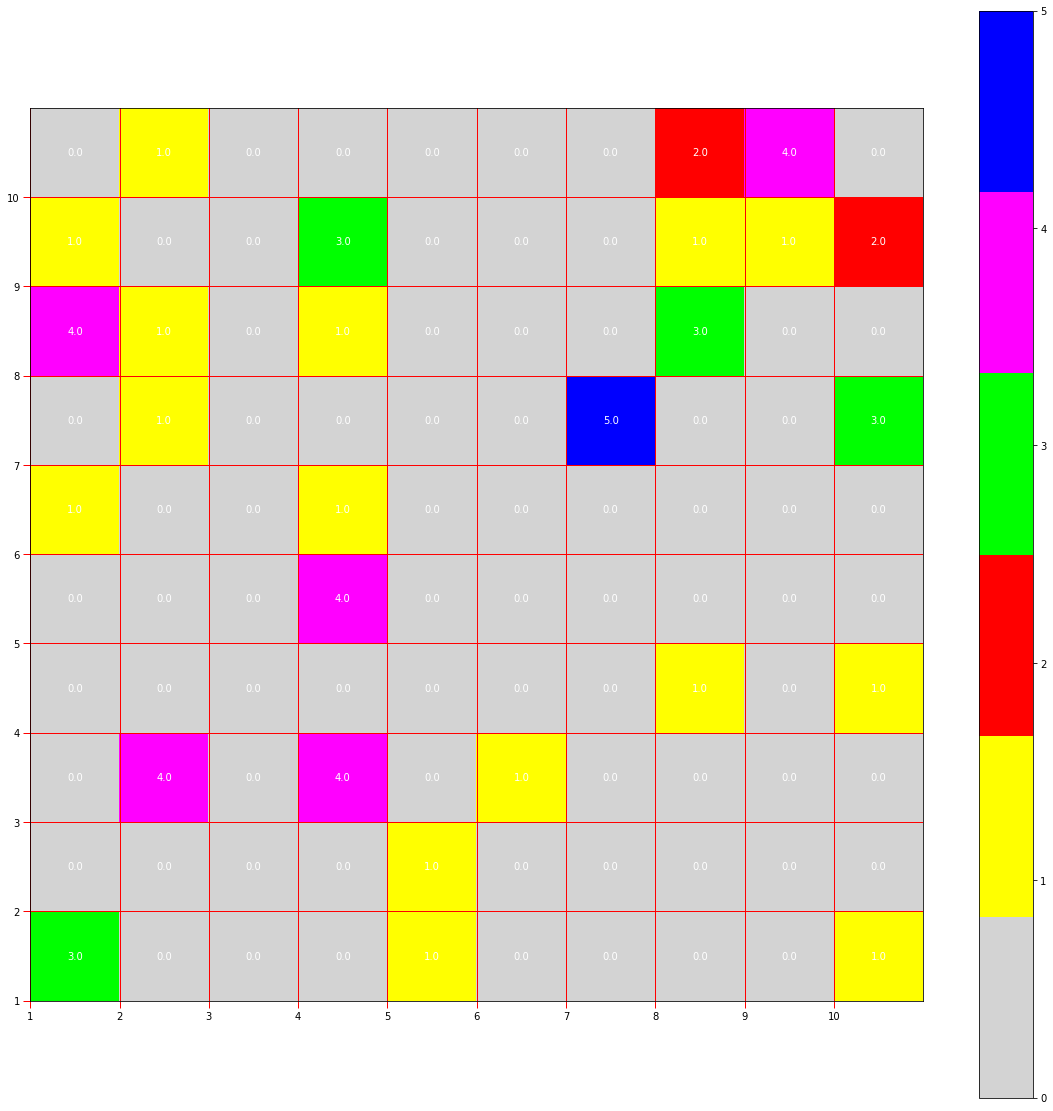

In [5]:
fig = plt.figure(figsize=(20,20))
norm = mplotcolors.Normalize(vmin=0, vmax=len(nvmdp.combined_cell_types)-1)
cell_colors = [cmap(norm(cell)) if isinstance(cell, int) else cell \
               for cell in nvmdp.combined_cell_types]
cmap = mplotcolors.ListedColormap(cell_colors, N=nvmdp.n_unique_cells)

p = NavGridView(nvmdp.map_state_cell_id[:,:,np.newaxis], coord_sys="cartesian", ax=plt.gca()).render(
    cmap=cmap).ticks().grid().add_text(fmt=".1f")
plt.colorbar(p.im)

## Image features

In [6]:
from scipy import misc
img_features = np.array([np.asarray(misc.face())]*(nvmdp.height * nvmdp.width))

Text(0.5,1,'Navigation World MDP with Image Features')

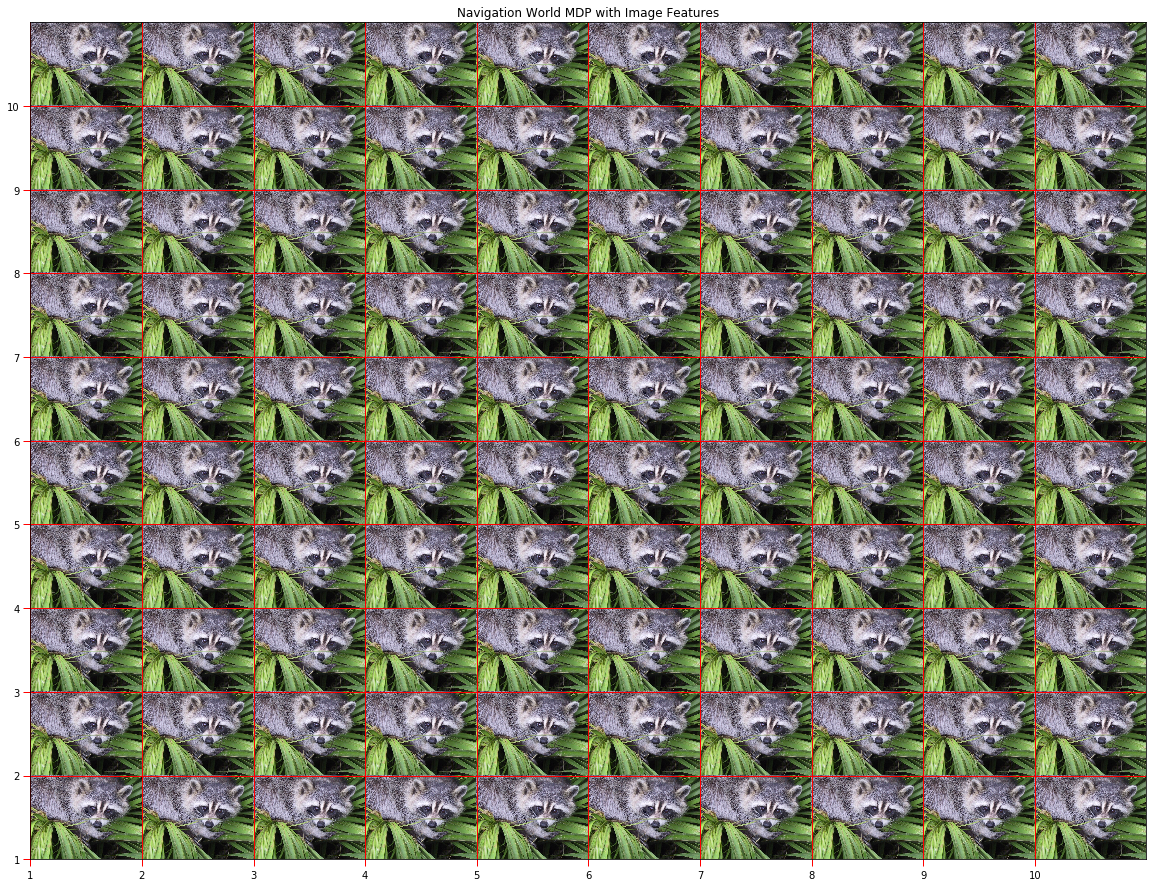

In [7]:
fig = plt.figure(figsize=(20,20))
p = NavGridView(img_features, coord_sys="cartesian", ax=plt.gca()).render().ticks(minor=False).grid()
plt.title("Navigation World MDP with Image Features")